### Criar um modelo preditivo de preço para apartamentos na cidade de Porto Alegre

In [338]:
import numpy as np
import time
import pandas as pd
import plotly.plotly as py
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("always")

In [339]:
# leitura da base de dados
#df = pd.read_csv('2018-06-30-foxter.csv', sep='\t', decimal=',')
df = pd.read_csv('2018-06-30-foxter.csv', sep='\t', decimal=',')

# total of rows
df.shape[0]

23199

In [340]:
df

Unnamed: 0      area             city  condominium        date  \
0               0    135.67     Porto Alegre      1000.00  2018-06-30   
1               1     75.00     Porto Alegre         0.00  2018-06-30   
2               2     83.13     Porto Alegre       500.00  2018-06-30   
3               3    104.83     Porto Alegre       800.00  2018-06-30   
4               4     83.13     Porto Alegre       500.00  2018-06-30   
5               5    128.00     Porto Alegre      1000.00  2018-06-30   
6               6    118.00     Porto Alegre          nan  2018-06-30   
7               7    122.59     Porto Alegre       600.00  2018-06-30   
8               8     79.35     Porto Alegre          nan  2018-06-30   
9               9    111.22     Porto Alegre       700.00  2018-06-30   
10             10     92.44     Porto Alegre          nan  2018-06-30   
11             11    110.14     Porto Alegre          nan  2018-06-30   
12             12    145.00     Porto Alegre       600.00  2018-06-30   
13             13    234.00     Porto Alegre          nan  2018-06-30   
14             14    104.83     Porto Alegre       800.00  2018-06-30   
15             15    236.32     Porto Alegre      2600.00  2018-06-30   
16             16    194.00     Porto Alegre       750.00  2018-06-30   
17             17    104.00     Porto Alegre       680.00  2018-06-30   
18             18    233.00     Porto Alegre       600.00  2018-06-30   
19             19    172.11     Porto Alegre      1621.00  2018-06-30   
20             20    338.16     Porto Alegre      2000.00  2018-06-30   
21             21     98.46     Porto Alegre       600.00  2018-06-30   
22             22    154.11     Porto Alegre      1386.00  2018-06-30   
23             23     83.88     Porto Alegre       650.00  2018-06-30   
24             24    153.79     Porto Alegre      2000.00  2018-06-30   
25             25    152.87     Porto Alegre      1000.00  2018-06-30   
26             26     79.66     Porto Alegre          nan  2018-06-30   
27             27    180.00     Porto Alegre      2000.00  2018-06-30   
28             28    173.98     Porto Alegre      1500.00  2018-06-30   
29             29    306.00     Porto Alegre      3130.00  2018-06-30   
30             30    266.15     Porto Alegre      2000.00  2018-06-30   
31             31    278.97     Porto Alegre      2000.00  2018-06-30   
32             32    181.21     Porto Alegre      1100.00  2018-06-30   
33             33    241.00     Porto Alegre          nan  2018-06-30   
34             34    322.00     Porto Alegre      1200.00  2018-06-30   
35             35    271.91     Porto Alegre      2000.00  2018-06-30   
36             36    510.00     Porto Alegre      2900.00  2018-06-30   
37             37    384.00     Porto Alegre          nan  2018-06-30   
38             38    239.34     Porto Alegre      2300.00  2018-06-30   
39             39    190.79     Porto Alegre      1500.00  2018-06-30   
40             40    401.76     Porto Alegre      3400.00  2018-06-30   
41             41    240.00     Porto Alegre          nan  2018-06-30   
42             42    255.11     Porto Alegre      1800.00  2018-06-30   
43             43    347.00     Porto Alegre          nan  2018-06-30   
44             44    192.20     Porto Alegre      1000.00  2018-06-30   
45             45    260.90     Porto Alegre      1700.00  2018-06-30   
46             46    390.00     Porto Alegre          nan  2018-06-30   
47             47    331.14     Porto Alegre      2000.00  2018-06-30   
48             48    243.39     Porto Alegre      2250.00  2018-06-30   
49             49    307.61     Porto Alegre      2500.00  2018-06-30   
50             50    403.16     Porto Alegre      2500.00  2018-06-30   
51             51    370.00     Porto Alegre      2600.00  2018-06-30   
52             52    322.19     Porto Alegre          nan  2018-06-30   
53             53    284.30     Porto Alegre      2642.00  2018-0

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23199 entries, 0 to 23198
Data columns (total 14 columns):
Unnamed: 0     23199 non-null int64
area           23140 non-null float64
city           23199 non-null object
condominium    14394 non-null float64
date           23199 non-null object
district       23197 non-null object
id             23199 non-null int64
iptu           16534 non-null float64
price          23193 non-null float64
rooms          23199 non-null object
segment        22537 non-null object
type           23199 non-null object
url            23199 non-null object
vagas          22026 non-null float64
dtypes: float64(5), int64(2), object(7)
memory usage: 2.5+ MB


In [342]:
df = df.rename(index=str, columns={"vagas": "box"})

In [343]:
# identificar o número da linha relativa ao meu apartamento
#_ = df.loc[df['id']==155515].index[0]

# modificar o valor de uma célula (n. da linha, n. da coluna)
#df.iloc[_, 5] = 'Mont Serrat'

# verificar se alterou
#df.loc[_]

In [344]:
df.loc[df.id == 155515]


Unnamed: 0   area          city  condominium        date     district  \
14371       14371 119.29  Porto Alegre       650.00  2018-06-30  Auxiliadora   

           id    iptu     price rooms      segment         type  \
14371  155515 2100.00 795000.00     3  Residencial  Apartamento   

                                                     url  box  
14371  http://www.foxterciaimobiliaria.com.br/imovel/... 2.00

In [345]:
# inserir a coluna do valor preço/m2
df['pm2'] = df['price'] / df['area']
df.loc[df.id == 155515]

Unnamed: 0   area          city  condominium        date     district  \
14371       14371 119.29  Porto Alegre       650.00  2018-06-30  Auxiliadora   

           id    iptu     price rooms      segment         type  \
14371  155515 2100.00 795000.00     3  Residencial  Apartamento   

                                                     url  box     pm2  
14371  http://www.foxterciaimobiliaria.com.br/imovel/... 2.00 6664.43

In [346]:
#retirar outros segmentos que não sejam o residencial
df.groupby(['segment']).count()

Unnamed: 0   area   city  condominium   date  \
segment                                                                
Comercial                     2232   2227   2232         1155   2232   
Comercial, Residencial        1283   1267   1283           77   1283   
Residencial                  19022  18986  19022        12866  19022   

                        district     id   iptu  price  rooms   type    url  \
segment                                                                      
Comercial                   2232   2232   1307   2232   2232   2232   2232   
Comercial, Residencial      1283   1283    794   1281   1283   1283   1283   
Residencial                19020  19022  13910  19018  19022  19022  19022   

                          box    pm2  
segment                               
Comercial                1872   2227  
Comercial, Residencial    987   1265  
Residencial             18594  18982

In [347]:
df = df.drop(df.query('(segment != "Residencial")').index)
df.groupby(['segment']).count()

Unnamed: 0   area   city  condominium   date  district     id  \
segment                                                                      
Residencial       19022  18986  19022        12866  19022     19020  19022   

              iptu  price  rooms   type    url    box    pm2  
segment                                                       
Residencial  13910  19018  19022  19022  19022  18594  18982

In [348]:
#manter somente os apartamentos
df.groupby(['type']).count()

Unnamed: 0   area   city  condominium   date  district     id  \
type                                                                         
Apartamento       11490  11487  11490         9486  11490     11490  11490   
Box                  36     36     36           34     36        36     36   
Casa               4985   4965   4985         1749   4985      4985   4985   
Cobertura          1077   1077   1077          970   1077      1077   1077   
Depósito              2      2      2            0      2         2      2   
Flat                181    179    181           94    181       181    181   
Loft                224    222    224          157    224       224    224   
Loja                 31     31     31            7     31        31     31   
Lote                 62     54     62           41     62        62     62   
Prédio               22     22     22            3     22        22     22   
Rural                36     36     36            0     36        36     36   
Sala                 36     36     36           30     36        36     36   
Terreno             840    839    840          295    840       838    840   

             iptu  price  rooms  segment    url    box    pm2  
type                                                           
Apartamento  8523  11488  11490    11490  11490  11480  11485  
Box            16     36     36       36     36     34     36  
Casa         3708   4983   4985     4985   4985   4977   4963  
Cobertura     801   1077   1077     1077   1077   1077   1077  
Depósito        0      2      2        2      2      2      2  
Flat           57    181    181      181    181    175    179  
Loft          146    224    224      224    224    218    222  
Loja            7     31     31       31     31     24     31  
Lote           58     62     62       62     62      4     54  
Prédio         14     22     22       22     22     19     22  
Rural          24     36     36       36     36     32     36  
Sala           25     36     36       36     36     31     36  
Terreno       531    840    840      840    840    521    839

In [349]:
#df = df.drop(df.query('(type != "Apartamento" and type != "Cobertura")').index)
df = df.drop(df.query('(type != "Apartamento")').index)
df.groupby(['type']).count()

Unnamed: 0   area   city  condominium   date  district     id  \
type                                                                         
Apartamento       11490  11487  11490         9486  11490     11490  11490   

             iptu  price  rooms  segment    url    box    pm2  
type                                                           
Apartamento  8523  11488  11490    11490  11490  11480  11485

In [350]:
#retirar a coluna 'Unnamed: 0' caso ela ainda exista
#retirar iptu porque tem muitos NaN e ficou com correlação alta com o preço
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.drop(['iptu'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11490 entries, 0 to 23162
Data columns (total 13 columns):
area           11487 non-null float64
city           11490 non-null object
condominium    9486 non-null float64
date           11490 non-null object
district       11490 non-null object
id             11490 non-null int64
price          11488 non-null float64
rooms          11490 non-null object
segment        11490 non-null object
type           11490 non-null object
url            11490 non-null object
box            11480 non-null float64
pm2            11485 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 1.2+ MB


In [351]:
#limpar a variável rooms
df.groupby(['rooms']).count()

area  city  condominium  date  district    id  price  \
rooms                                                                           
\n 0\n 1\n 2\n 3\n 4+\n    17    18           17    18        18    18     18   
1                        1817  1817         1514  1817      1817  1817   1816   
2                        5358  5359         4357  5359      5359  5359   5358   
3                        4018  4019         3364  4019      4019  4019   4019   
4                         259   259          222   259       259   259    259   
5                          15    15           10    15        15    15     15   
6                           3     3            2     3         3     3      3   

                         segment  type   url   box   pm2  
rooms                                                     
\n 0\n 1\n 2\n 3\n 4+\n       18    18    18    18    17  
1                           1817  1817  1817  1811  1816  
2                           5359  5359  5359  5355  5357  
3                           4019  4019  4019  4019  4018  
4                            259   259   259   259   259  
5                             15    15    15    15    15  
6                              3     3     3     3     3

In [352]:
# errors='coerce' o que não puder ser transformado vai virar NaN
df['rooms'] = pd.to_numeric(df['rooms'], downcast='integer', errors='coerce')
df.groupby(['rooms']).count()

area  city  condominium  date  district    id  price  segment  type  \
rooms                                                                        
1.00   1817  1817         1514  1817      1817  1817   1816     1817  1817   
2.00   5358  5359         4357  5359      5359  5359   5358     5359  5359   
3.00   4018  4019         3364  4019      4019  4019   4019     4019  4019   
4.00    259   259          222   259       259   259    259      259   259   
5.00     15    15           10    15        15    15     15       15    15   
6.00      3     3            2     3         3     3      3        3     3   

        url   box   pm2  
rooms                    
1.00   1817  1811  1816  
2.00   5359  5355  5357  
3.00   4019  4019  4018  
4.00    259   259   259  
5.00     15    15    15  
6.00      3     3     3

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11490 entries, 0 to 23162
Data columns (total 13 columns):
area           11487 non-null float64
city           11490 non-null object
condominium    9486 non-null float64
date           11490 non-null object
district       11490 non-null object
id             11490 non-null int64
price          11488 non-null float64
rooms          11472 non-null float64
segment        11490 non-null object
type           11490 non-null object
url            11490 non-null object
box            11480 non-null float64
pm2            11485 non-null float64
dtypes: float64(6), int64(1), object(6)
memory usage: 1.2+ MB


In [354]:
#df['box'].value_counts(dropna=False)

In [355]:
# Convertendo as variáveis para os formatos corretos

df['date'] = pd.to_datetime(df['date'])

df['box'] = pd.to_numeric(df['box'], downcast='integer', errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11490 entries, 0 to 23162
Data columns (total 13 columns):
area           11487 non-null float64
city           11490 non-null object
condominium    9486 non-null float64
date           11490 non-null datetime64[ns]
district       11490 non-null object
id             11490 non-null int64
price          11488 non-null float64
rooms          11472 non-null float64
segment        11490 non-null object
type           11490 non-null object
url            11490 non-null object
box            11480 non-null float64
pm2            11485 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 1.2+ MB


In [356]:
# removendo todos os NaN
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9458 entries, 0 to 23161
Data columns (total 13 columns):
area           9458 non-null float64
city           9458 non-null object
condominium    9458 non-null float64
date           9458 non-null datetime64[ns]
district       9458 non-null object
id             9458 non-null int64
price          9458 non-null float64
rooms          9458 non-null float64
segment        9458 non-null object
type           9458 non-null object
url            9458 non-null object
box            9458 non-null float64
pm2            9458 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 1.0+ MB


In [357]:
#manter apenas a cidade de Porto Alegre
df.groupby(['city']).count()

area  condominium  date  district    id  price  rooms  \
city                                                                        
Alvorada              30           30    30        30    30     30     30   
Balneário Camboriú     2            2     2         2     2      2      2   
Bento Gonçalves        4            4     4         4     4      4      4   
Cachoeirinha          72           72    72        72    72     72     72   
Canela                 6            6     6         6     6      6      6   
Canoas               376          376   376       376   376    376    376   
Capão Novo             4            4     4         4     4      4      4   
Capão da Canoa        67           67    67        67    67     67     67   
Caxias do Sul         16           16    16        16    16     16     16   
Cidreira               4            4     4         4     4      4      4   
Esteio                14           14    14        14    14     14     14   
Florianópolis          8            8     8         8     8      8      8   
Gramado               70           70    70        70    70     70     70   
Gravataí              22           22    22        22    22     22     22   
Imbé                   2            2     2         2     2      2      2   
Itapema                2            2     2         2     2      2      2   
Novo Hamburgo         28           28    28        28    28     28     28   
Pelotas                2            2     2         2     2      2      2   
Porto Alegre        8519         8519  8519      8519  8519   8519   8519   
Rio Grande             2            2     2         2     2      2      2   
Santa Catarina         2            2     2         2     2      2      2   
Santa Maria            4            4     4         4     4      4      4   
Sapucaia do Sul        6            6     6         6     6      6      6   
São Leopoldo          32           32    32        32    32     32     32   
Torres                31           31    31        31    31     31     31   
Tramandaí             62           62    62        62    62     62     62   
Viamão                 2            2     2         2     2      2      2   
Xangri-Lá             57           57    57        57    57     57     57   
Xangri-lá             12           12    12        12    12     12     12   

                    segment  type   url   box   pm2  
city                                                 
Alvorada                 30    30    30    30    30  
Balneário Camboriú        2     2     2     2     2  
Bento Gonçalves           4     4     4     4     4  
Cachoeirinha             72    72    72    72    72  
Canela                    6     6     6     6     6  
Canoas                  376   376   376   376   376  
Capão Novo                4     4     4     4     4  
Capão da Canoa           67    67    67    67    67  
Caxias do Sul            16    16    16    16    16  
Cidreira                  4     4     4     4     4  
Esteio                   14    14    14    14    14  
Florianópolis             8     8     8     8     8  
Gramado                  70    70    70    70    70  
Gravataí                 22    22    22    22    22  
Imbé                      2     2     2     2     2  
Itapema                   2     2     2     2     2  
Novo Hamburgo            28    28    28    28    28  
Pelotas                   2     2     2     2     2  
Porto Alegre           8519  8519  8519  8519  8519  
Rio Grande                2     2     2     2     2  
Santa Catarina            2     2     2     2     2  
Santa Maria               4     4     4     4     4  
Sapucaia do Sul           6     6     6     6     6  
São Leopoldo             32    32    32    32    32  
Torres                   31    31    31    31    31  
Tramandaí                62    62    62    62    62  
Viamão                    2     2     2     2     2  
Xangri-Lá                57    57    57    57    57  
Xangri-lá   

In [358]:
df = df.drop(df.query('(city != "Porto Alegre")').index)
df.groupby(['city']).count()

area  condominium  date  district    id  price  rooms  segment  \
city                                                                           
Porto Alegre  8519         8519  8519      8519  8519   8519   8519     8519   

              type   url   box   pm2  
city                                  
Porto Alegre  8519  8519  8519  8519

In [359]:
pd.pivot_table(df, index=['district'], aggfunc=[np.mean], values=['area', 'price'])

mean           
                          area      price
district                                 
Aberta dos Morros        73.43  261560.00
Agronomia                50.17  219565.79
Alto Petrópolis          56.21  247613.04
Auxiliadora             136.97 1320582.93
Azenha                   62.82  353421.76
Bela Vista              163.01 1655095.10
Boa Vista                91.77  639244.80
Bom Fim                  89.63  500302.44
Bom Jesus                59.85  299242.06
Camaquã                  57.42  263714.77
Campo Novo               50.55  211600.00
Cascata                  56.94  254070.00
Cavalhada                64.70  328483.99
Centro                   46.49  454000.00
Centro Histórico         72.94  360474.36
Chácara das Pedras       93.29  627996.97
Cidade Baixa             69.04  398102.49
Coronel Aparício Borges  57.86  223750.00
Cristal                  67.24  356767.62
Cristo Redentor          77.28  423473.04
Espírito Santo           55.30  272000.00
Farrapos                 53.42  278358.75
Farroupilha             176.97  438349.92
Floresta                 80.93  411418.72
Glória                   57.95  330976.71
Guarujá                  59.29  260777.78
Higienópolis            101.63  695975.75
Hipica                   54.27  233309.33
Humaita                  50.54  310000.00
Humaitá                  58.16  248238.15
Hípica                   49.01  226666.67
Independência           117.72  692215.02
Ipanema                  73.47  357298.12
Jardim Botânico          71.19  446177.82
Jardim Carvalho          65.70  357501.83
Jardim Europa           163.22 2022530.59
Jardim Floresta          62.94  358958.33
Jardim Isabel           261.00  999000.00
Jardim Itu Sabará       115.28  385256.33
Jardim Itu-Sabará        76.86  431768.93
Jardim Leopoldina        46.45  162113.79
Jardim Lindoia           74.82  602468.80
Jardim Lindóia           95.08  587439.51
Jardim Sao Pedro         82.47  407760.00
Jardim São Pedro         76.03  380444.44
Jardim do Salso          87.02  657175.21
Lomba do Pinheiro        41.24  132142.86
Medianeira               71.73  335343.61
Menino Deus              78.07  540730.88
Moinhos de Vento        182.31 1576421.09
Mont Serrat             115.73  914266.77
Mont'Serrat             125.67  901000.00
Morro Santana            49.62  199475.00
Mário Quintana           43.25  207500.00
Navegantes               69.72  299149.14
Nonoai                   65.07  264050.56
Parque Santa Fé          48.18  158290.00
Partenon                 61.97  315737.08
Passo d'Areia            76.34  548585.00
Passo da Areia           72.22  489416.98
Passo das Pedras         53.42  238595.71
Paternon                 57.20  264666.67
Pedra Redonda           135.74 1134166.67
Petrópolis               97.82  770476.10
Praia de Belas           62.33  366017.45
Protásio Alves           53.00  222263.68
Restinga                 43.22  126513.04
Rio Branco              108.55  720527.68
Rubem Berta              47.05  143232.56
Santa Cecilia            98.78  597000.00
Santa Cecília            88.43  533769.23
Santa Maria Goretti      71.15  310328.57
Santa Teresa             71.47  394933.33
Santa Tereza             79.28  398582.47
Santana                  73.98  432466.18
Santo Antônio            58.41  283111.41
Sarandi                  60.45  281385.56
São Geraldo              73.12  388921.90
São José                 51.29  253570.83
São João                 87.59  540147.62
São Sebastião            61.68  284923.40
Teresópolis              65.46  331474.38
Tristeza                 78.92  514835.79
Três Figueiras          121.44 1274832.91
Vila Assunção           113.73  578346.15
Vila Conceição           64.44  394800.38
Vila Ipiranga            73.48 5158832.19
Vila Jardim              76.69  561291.88
Vila João Pessoa         94.27  382500.00
Vila Nova                51.07  204867.14
hipica                   45.47  222500.00

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 23161
Data columns (total 13 columns):
area           8519 non-null float64
city           8519 non-null object
condominium    8519 non-null float64
date           8519 non-null datetime64[ns]
district       8519 non-null object
id             8519 non-null int64
price          8519 non-null float64
rooms          8519 non-null float64
segment        8519 non-null object
type           8519 non-null object
url            8519 non-null object
box            8519 non-null float64
pm2            8519 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 931.8+ KB


In [361]:
#total de elementos únicos e repetidos

print ("total de elementos: " + str(df.shape[0]))
print ("total de elemento únicos: " + str(df.id.nunique()))
print ("elementos repetidos: " + str(df.shape[0] - df.id.nunique()))

total de elementos: 8519
total de elemento únicos: 8036
elementos repetidos: 483


In [362]:
#apagar duplicados
df = df.drop_duplicates(subset=['id'])
print ("elementos repetidos: " + str(df.shape[0] - df.id.nunique()))

elementos repetidos: 0


In [363]:
#identificar duplicados

_ = df[df.duplicated(['id'], keep=False)]['id']
_.sort_values()


Series([], Name: id, dtype: int64)

In [364]:
#quantidade de missing values

_ = df.isnull().sum(axis=0) 
print ("quantidade de missing values: "+str(_.sum()))

quantidade de missing values: 0


In [365]:
pd.options.display.max_rows = 4000

In [366]:
#identificar bairros
df['district'].value_counts().sort_index()

Aberta dos Morros           10
Agronomia                   33
Alto Petrópolis             22
Auxiliadora                203
Azenha                      88
Bela Vista                 170
Boa Vista                  113
Bom Fim                    118
Bom Jesus                   45
Camaquã                     98
Campo Novo                   4
Cascata                      9
Cavalhada                  165
Centro                       5
Centro Histórico           368
Chácara das Pedras          63
Cidade Baixa               135
Coronel Aparício Borges      4
Cristal                    268
Cristo Redentor            155
Espírito Santo               1
Farrapos                     4
Farroupilha                 60
Floresta                   152
Glória                      41
Guarujá                      8
Higienópolis               151
Hipica                       3
Humaita                      1
Humaitá                     87
Hípica                       3
Independência              125
Ipanema 

In [367]:
# Corrigir os nomes dos bairros errados
df['district'] = df['district'].replace("Mont'Serrat", "Mont Serrat")
df['district'] = df['district'].replace('Humaita', "Humaitá")
df['district'] = df['district'].replace('Jardim Itu Sabará', "Jardim Itu-Sabará")
df['district'] = df['district'].replace('Jardim Lindoia', "Jardim Lindóia")
df['district'] = df['district'].replace('Jardim Sao Pedro', "Jardim São Pedro")
df['district'] = df['district'].replace('Passo da Areia', "Passo d'Areia")
df['district'] = df['district'].replace('Santa Cecilia', "Santa Cecília")
df['district'] = df['district'].replace('Santa Teresa', "Santa Tereza")
df['district'] = df['district'].replace('hipica', "Hípica")
df['district'] = df['district'].replace('Hipica', "Hípica")
df['district'] = df['district'].replace('Centro', "Centro Histórico")

In [368]:
df['district'].value_counts().sort_index()

Aberta dos Morros           10
Agronomia                   33
Alto Petrópolis             22
Auxiliadora                203
Azenha                      88
Bela Vista                 170
Boa Vista                  113
Bom Fim                    118
Bom Jesus                   45
Camaquã                     98
Campo Novo                   4
Cascata                      9
Cavalhada                  165
Centro Histórico           373
Chácara das Pedras          63
Cidade Baixa               135
Coronel Aparício Borges      4
Cristal                    268
Cristo Redentor            155
Espírito Santo               1
Farrapos                     4
Farroupilha                 60
Floresta                   152
Glória                      41
Guarujá                      8
Higienópolis               151
Humaitá                     88
Hípica                       8
Independência              125
Ipanema                     24
Jardim Botânico            169
Jardim Carvalho            122
Jardim E

In [369]:
# retornando a configuração do display para default.
#pd.reset_option('display.max_colwidth')

In [370]:
#remover elementos cujos bairros possuem menos de 88 elementos (total de Mont Serrat)
#df = df.groupby('district').filter(lambda x: len(x) >= 88)
#df['district'].value_counts().tail()

In [371]:
# manter apenas Mont'Serrat
#df = df.drop(df.query("(district != 'Mont Serrat' & district != 'Auxiliadora' & district != 'Bela Vista')").index)
#df = df.drop(df.query("(district != 'Auxiliadora')").index)
df = df.drop(df.query("(district != 'Mont Serrat')").index)
df.groupby(['district']).count()

area  city  condominium  date   id  price  rooms  segment  type  \
district                                                                       
Mont Serrat   107   107          107   107  107    107    107      107   107   

             url  box  pm2  
district                    
Mont Serrat  107  107  107



# Análise


In [372]:
#Total de ofertas
df.shape[0]

107

In [373]:
#total de oferta por bairros (>100)
#df['district'].value_counts()
#df.groupby('district').filter(lambda x: len(x) >= 100){:,.2f}
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.pivot_table(df, index=["district"],aggfunc={"id":len,
                                               "price":np.mean,
                                               "area":np.mean,
                                              "rooms":np.mean,
                                              "box":np.mean,
                                              "pm2":np.mean})

area  box   id     pm2     price  rooms
district                                             
Mont Serrat 111.54 1.86  107 7707.07 871083.09   2.43

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 29 to 22374
Data columns (total 13 columns):
area           107 non-null float64
city           107 non-null object
condominium    107 non-null float64
date           107 non-null datetime64[ns]
district       107 non-null object
id             107 non-null int64
price          107 non-null float64
rooms          107 non-null float64
segment        107 non-null object
type           107 non-null object
url            107 non-null object
box            107 non-null float64
pm2            107 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 11.7+ KB


In [375]:
# retirar colunas desnecessárias
df.drop(['city'], axis = 1, inplace = True)
#df.drop(['date'], axis = 1, inplace = True)
#df.drop(['id'], axis = 1, inplace = True)
df.drop(['segment'], axis = 1, inplace = True)
df.drop(['type'], axis = 1, inplace = True)
#df.drop(['url'], axis = 1, inplace = True)
#df.info()

In [376]:
### df.describe()

In [377]:
# boxplot para identificar outliers

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.plotly as py
import plotly.graph_objs as go

x = df.district

trace0 = go.Box(
    y=df.price,
    x=x,
    name='kale',
    marker=dict(
        color='blue'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='preço de venda',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [378]:
# retirar outliers - manualmente
#df = df[df.price < 1690000] # retira de todos os bairros
#df = df.drop(df.query("(district == 'Bela Vista' & price > 3500000)").index)
#df = df.drop(df.query("(district == 'Auxiliadora' & price > 3500000)").index)
df = df.drop(df.query("(district == 'Mont Serrat' & price > 1900000)").index)

#outliers = df.loc[df['price'] > 2270000]
#outliers.to_csv(('outliers.csv'), sep='\t')


In [379]:
import plotly.plotly as py
import plotly.graph_objs as go

x = df.district

trace0 = go.Box(
    y=df.price,
    x=x,
    name='kale',
    marker=dict(
        color='blue'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='preço de venda',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [380]:
df

area  condominium       date     district      id      price  rooms  \
180    94.00       250.00 2018-06-30  Mont Serrat  161618  480000.00   2.00   
185    64.42       350.00 2018-06-30  Mont Serrat  166992  398000.00   2.00   
195    74.43       717.00 2018-06-30  Mont Serrat    7932  720000.00   2.00   
196    83.86       577.00 2018-06-30  Mont Serrat  172567  670000.00   2.00   
5741   52.93       430.00 2018-06-30  Mont Serrat  147669  453000.00   1.00   
6152  198.40       800.00 2018-06-30  Mont Serrat  115046 1349000.00   3.00   
8455   84.00       750.00 2018-06-30  Mont Serrat  174388  799000.00   2.00   
8472  126.37      1400.00 2018-06-30  Mont Serrat  174355 1300000.00   3.00   
8484  107.18       550.00 2018-06-30  Mont Serrat  174188  560000.00   2.00   
8685   73.00       300.00 2018-06-30  Mont Serrat  173983  460000.00   2.00   
8772  142.13      1900.00 2018-06-30  Mont Serrat  104286 1700000.00   3.00   
8818  136.87      1200.00 2018-06-30  Mont Serrat  171640  945000.00   3.00   
8907   74.29       400.00 2018-06-30  Mont Serrat  172787  585000.00   2.00   
8986  175.92      1200.00 2018-06-30  Mont Serrat  172799 1200000.00   3.00   
9153   70.74       618.00 2018-06-30  Mont Serrat  171694  739000.00   2.00   
9238   71.36       400.00 2018-06-30  Mont Serrat  172677  320000.00   2.00   
9324  103.94      1080.00 2018-06-30  Mont Serrat  172150  760000.00   3.00   
9694  213.10      1350.00 2018-06-30  Mont Serrat  171175 1550000.00   3.00   
9768  103.00       700.00 2018-06-30  Mont Serrat  171457  650000.00   3.00   
9805   72.40       300.00 2018-06-30  Mont Serrat  165592  320000.00   2.00   
9899  132.56       715.00 2018-06-30  Mont Serrat  171641 1100000.00   3.00   
10072 139.96      1001.00 2018-06-30  Mont Serrat  170141 1600000.00   3.00   
10130  77.82       280.00 2018-06-30  Mont Serrat  170210  310000.00   2.00   
10156  85.79       700.00 2018-06-30  Mont Serrat  170361  598000.00   2.00   
10266  81.82      1100.00 2018-06-30  Mont Serrat  130601  860000.00   1.00   
10463 143.59      1063.00 2018-06-30  Mont Serrat  168798  900000.00   3.00   
10522  65.42       670.00 2018-06-30  Mont Serrat  172007  340000.00   2.00   
10559  79.00       650.00 2018-06-30  Mont Serrat  100964  550000.00   2.00   
10654  39.77       360.00 2018-06-30  Mont Serrat  168760  560000.00   1.00   
10731 103.68       990.00 2018-06-30  Mont Serrat  168479  940000.00   3.00   
10876 142.13      1900.00 2018-06-30  Mont Serrat  168093 1600000.00   3.00   
11301  51.82       400.00 2018-06-30  Mont Serrat  139024  360000.00   1.00   
11325  76.23       660.00 2018-06-30  Mont Serrat  165781  805500.00   2.00   
11327  70.42       600.00 2018-06-30  Mont Serrat  165670  607500.00   2.00   
11436 107.00       580.00 2018-06-30  Mont Serrat  165777  580000.00   2.00   
11550 114.88      1100.00 2018-06-30  Mont Serrat  165673 1152000.00   3.00   
11551  41.95       420.00 2018-06-30  Mont Serrat  165671  428510.00   1.00   
11552  36.76       400.00 2018-06-30  Mont Serrat  165669  422000.00   1.00   
11827 125.15       900.00 2018-06-30  Mont Serrat  164846 1500000.00   2.00   
11866 124.12       900.00 2018-06-30  Mont Serrat  164706  750000.00   3.00   
11944 114.60       950.00 2018-06-30  Mont Serrat  164089  850000.00   3.00   
12178 271.58       700.00 2018-06-30  Mont Serrat  120041 1550000.00   4.00   
12340 154.83       602.00 2018-06-30  Mont Serrat  162365  680000.00   3.00   
12612 102.64      1000.00 2018-06-30  Mont Serrat  161608 1100000.00   3.00   
12620  70.97       450.00 2018-06-30  Mont Serrat  162702  370000.00   2.00   
12695 190.00      1442.00 2018-06-30  Mont Serrat    4165 1590000.00   3.00   
12711  84.26       890.00 2018-06-30  Mont Serrat  161222  799000.00   2.00   
13022 107.83       650.00 2018-06-30  Mont Serrat  160220  639000.00   3.00   
13025  43.83       350.00 2018-06-30  Mont Serrat  142701  310000.00   1.00   
13049  78.30       600.00 2018-06-30  Mont Serrat  159826 

In [381]:
#df = pd.get_dummies(df, columns=["district"], drop_first=True)

#df

In [382]:
df.describe()

area  condominium        id      price  rooms    box      pm2
count 101.00       101.00    101.00     101.00 101.00 101.00   101.00
mean  103.12       748.06 138261.62  772036.73   2.39   1.79  7553.50
std    43.55       385.66  49462.92  376238.49   0.75   0.41  2185.53
min    36.76       130.00   2442.00  240000.00   1.00   1.00  3983.55
25%    72.40       420.00 137038.00  453000.00   2.00   2.00  5763.24
50%    97.00       700.00 156727.00  720000.00   3.00   2.00  7131.63
75%   127.00      1000.00 166335.00  990000.00   3.00   2.00  9431.27
max   271.58      1900.00 174560.00 1700000.00   4.00   2.00 14080.97

In [383]:
#histogram

import plotly.figure_factory as ff

hist_data = [df.price]
group_labels = ['distplot']
 
fig = ff.create_distplot(hist_data, group_labels, bin_size=20)
iplot(fig, filename='Distribuição pelo Preço de Venda')

In [384]:
#features_list = ["area", "box", "condominium", "pm2", "rooms",
#                       "district_Auxiliadora", "district_Bela Vista", "district_Mont Serrat"]

features_list = ["area", "box", "condominium", "rooms"]
#                       "district_Bela Vista", "district_Mont Serrat"]

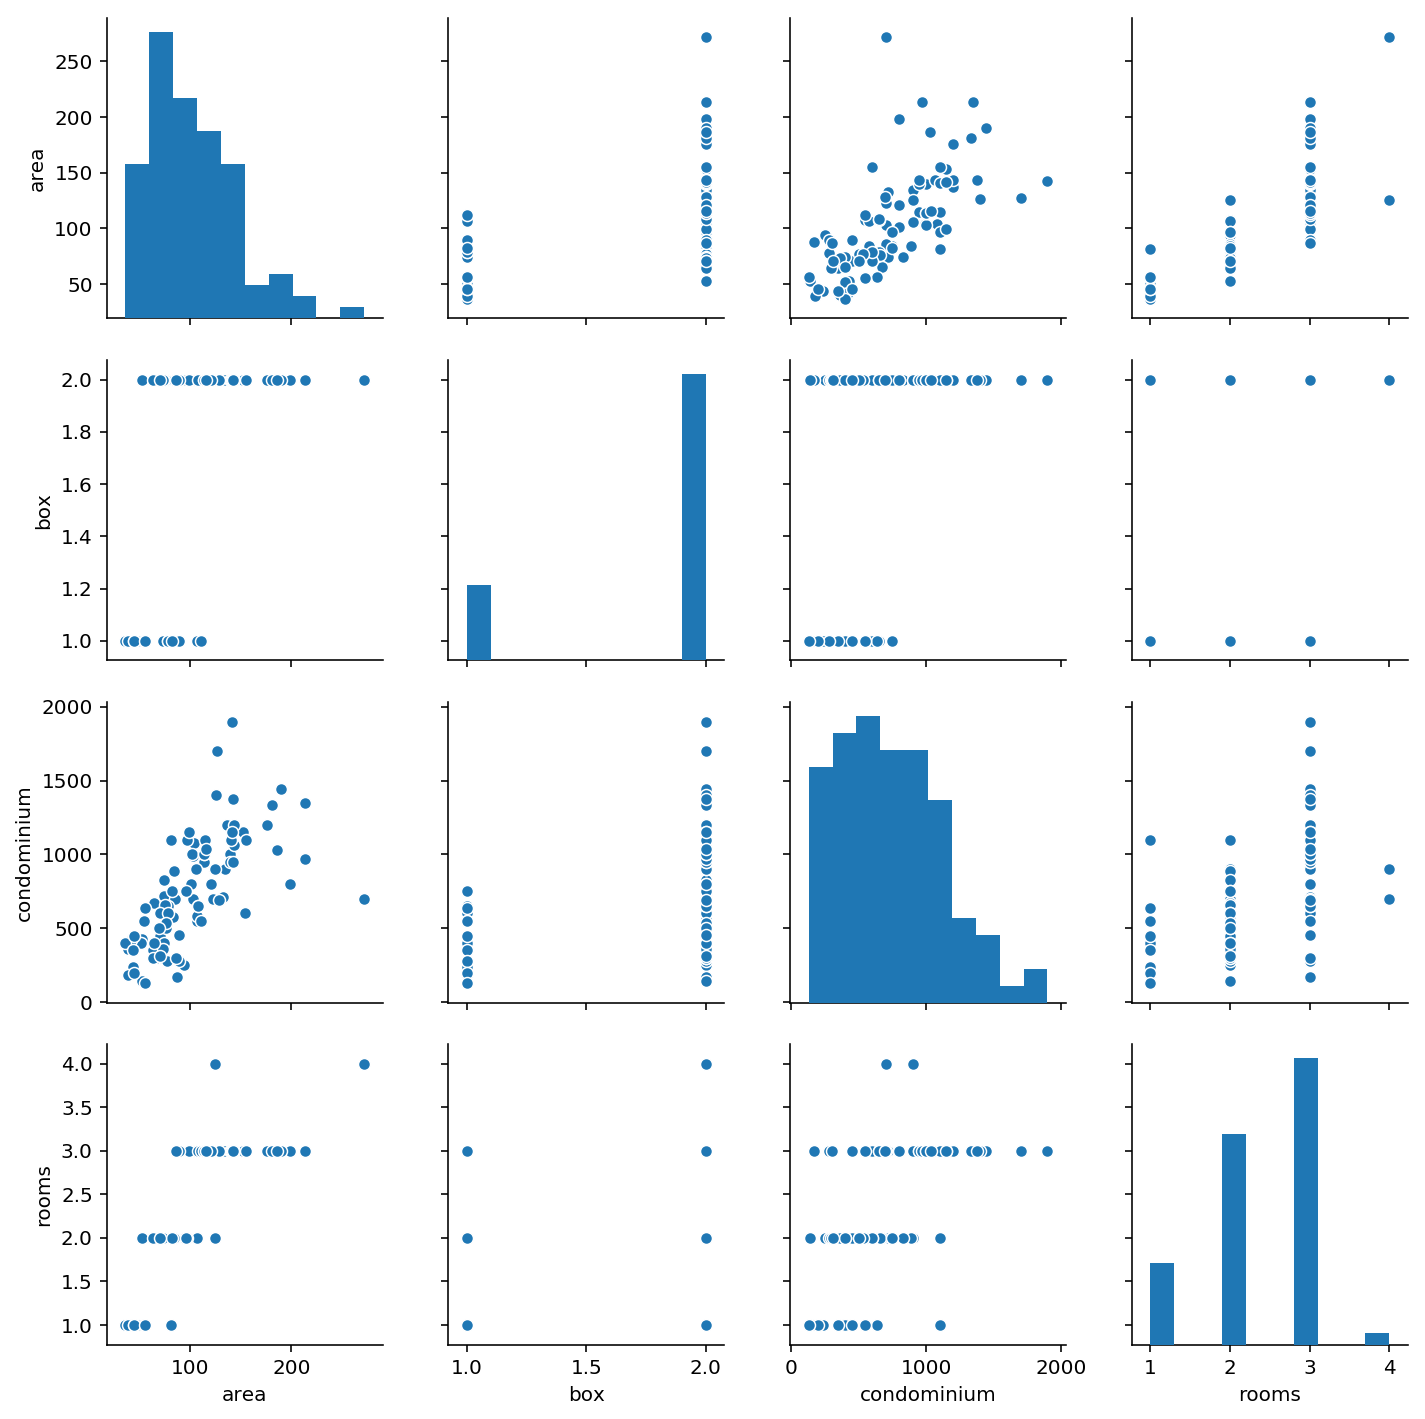

In [385]:
import seaborn as sns
sns.pairplot(df, vars=(features_list))

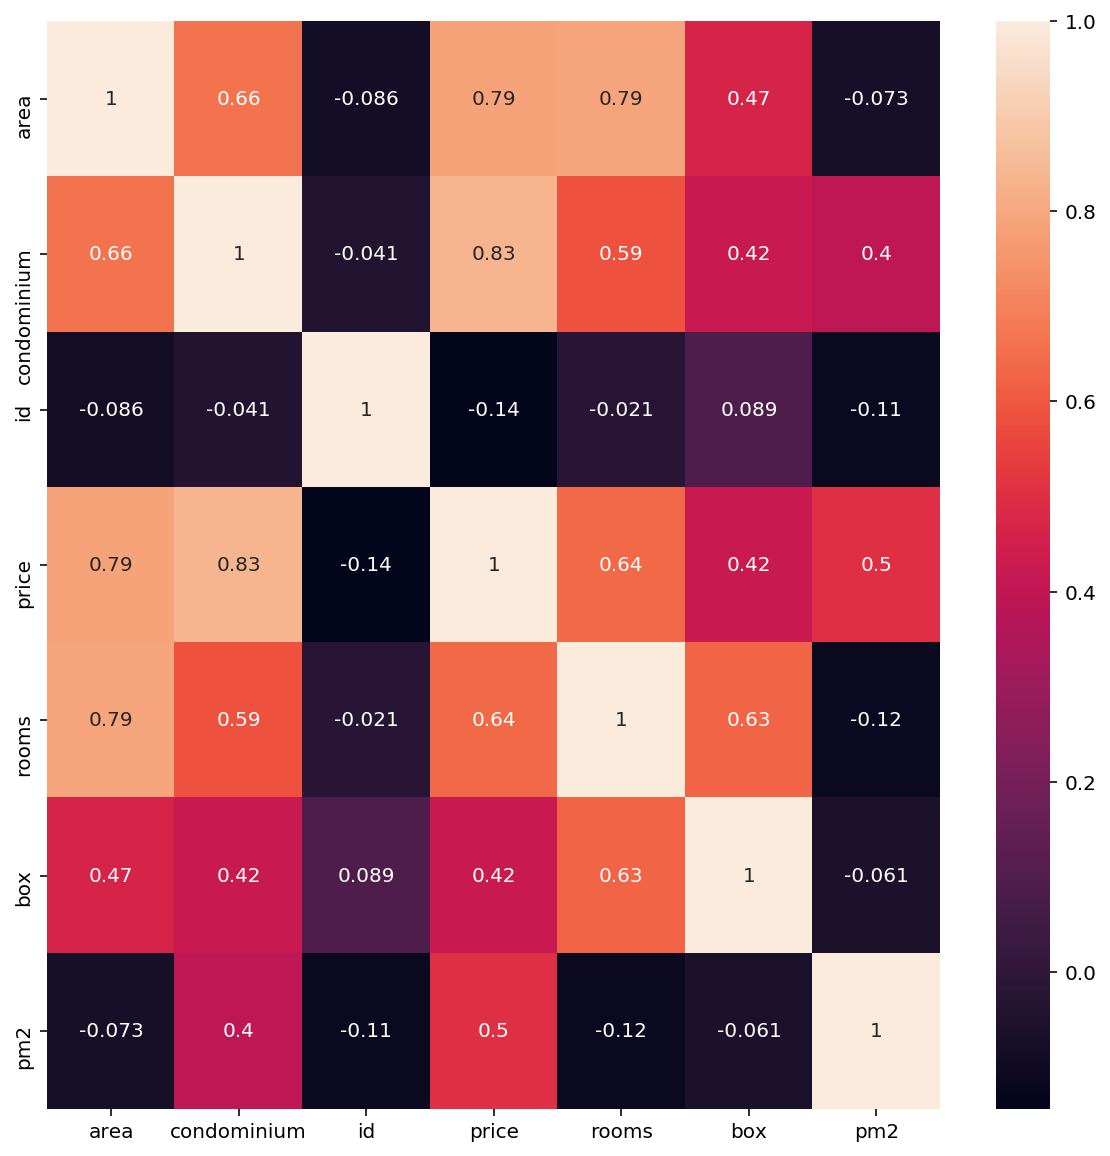

In [386]:
#df_s_id = df
#df_s_id.drop(['id'], axis = 1, inplace = True)
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

'''
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tools

trace1 = go.Scatter(
    name='test',
    x = df.area,
    y = df.price,
    mode='markers',
    marker=dict(
        size=5,
        color = np.log(df.price), #set color equal to a variable
        colorscale='Viridis',
        showscale=False
    )
)

trace2 = go.Scatter(
    x = np.log(df.area),
    y = np.log(df.price),
    mode='markers',
    marker=dict(
        size=5,
        color = np.log(df.price), #set color equal to a variable
        colorscale='Viridis',
        showscale=False
    )
)

fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('size x price', 'size x price (log)'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
#fig.append_trace(trace3, 2, 1)
#fig.append_trace(trace4, 2, 2)



fig['layout'].update(height=600, width=800, title='Stacked subplots')
iplot(fig)
'''

In [387]:
#df.loc[:, 'area':'box']

In [388]:
# para ser utilizado no próximo bloco para selecionar o X
#df.iloc[:, df.columns.get_indexer(features_list)]

In [389]:
# retirar os valores X e y do DataFrame
features = df.iloc[:, df.columns.get_indexer(features_list)]
X = features.values
y = df['price'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))


X.shape: (101, 4) y.shape: (101,)


In [390]:
print (df.columns.get_indexer(features_list))

[0 8 1 6]


In [391]:
df

area  condominium       date     district      id      price  rooms  \
180    94.00       250.00 2018-06-30  Mont Serrat  161618  480000.00   2.00   
185    64.42       350.00 2018-06-30  Mont Serrat  166992  398000.00   2.00   
195    74.43       717.00 2018-06-30  Mont Serrat    7932  720000.00   2.00   
196    83.86       577.00 2018-06-30  Mont Serrat  172567  670000.00   2.00   
5741   52.93       430.00 2018-06-30  Mont Serrat  147669  453000.00   1.00   
6152  198.40       800.00 2018-06-30  Mont Serrat  115046 1349000.00   3.00   
8455   84.00       750.00 2018-06-30  Mont Serrat  174388  799000.00   2.00   
8472  126.37      1400.00 2018-06-30  Mont Serrat  174355 1300000.00   3.00   
8484  107.18       550.00 2018-06-30  Mont Serrat  174188  560000.00   2.00   
8685   73.00       300.00 2018-06-30  Mont Serrat  173983  460000.00   2.00   
8772  142.13      1900.00 2018-06-30  Mont Serrat  104286 1700000.00   3.00   
8818  136.87      1200.00 2018-06-30  Mont Serrat  171640  945000.00   3.00   
8907   74.29       400.00 2018-06-30  Mont Serrat  172787  585000.00   2.00   
8986  175.92      1200.00 2018-06-30  Mont Serrat  172799 1200000.00   3.00   
9153   70.74       618.00 2018-06-30  Mont Serrat  171694  739000.00   2.00   
9238   71.36       400.00 2018-06-30  Mont Serrat  172677  320000.00   2.00   
9324  103.94      1080.00 2018-06-30  Mont Serrat  172150  760000.00   3.00   
9694  213.10      1350.00 2018-06-30  Mont Serrat  171175 1550000.00   3.00   
9768  103.00       700.00 2018-06-30  Mont Serrat  171457  650000.00   3.00   
9805   72.40       300.00 2018-06-30  Mont Serrat  165592  320000.00   2.00   
9899  132.56       715.00 2018-06-30  Mont Serrat  171641 1100000.00   3.00   
10072 139.96      1001.00 2018-06-30  Mont Serrat  170141 1600000.00   3.00   
10130  77.82       280.00 2018-06-30  Mont Serrat  170210  310000.00   2.00   
10156  85.79       700.00 2018-06-30  Mont Serrat  170361  598000.00   2.00   
10266  81.82      1100.00 2018-06-30  Mont Serrat  130601  860000.00   1.00   
10463 143.59      1063.00 2018-06-30  Mont Serrat  168798  900000.00   3.00   
10522  65.42       670.00 2018-06-30  Mont Serrat  172007  340000.00   2.00   
10559  79.00       650.00 2018-06-30  Mont Serrat  100964  550000.00   2.00   
10654  39.77       360.00 2018-06-30  Mont Serrat  168760  560000.00   1.00   
10731 103.68       990.00 2018-06-30  Mont Serrat  168479  940000.00   3.00   
10876 142.13      1900.00 2018-06-30  Mont Serrat  168093 1600000.00   3.00   
11301  51.82       400.00 2018-06-30  Mont Serrat  139024  360000.00   1.00   
11325  76.23       660.00 2018-06-30  Mont Serrat  165781  805500.00   2.00   
11327  70.42       600.00 2018-06-30  Mont Serrat  165670  607500.00   2.00   
11436 107.00       580.00 2018-06-30  Mont Serrat  165777  580000.00   2.00   
11550 114.88      1100.00 2018-06-30  Mont Serrat  165673 1152000.00   3.00   
11551  41.95       420.00 2018-06-30  Mont Serrat  165671  428510.00   1.00   
11552  36.76       400.00 2018-06-30  Mont Serrat  165669  422000.00   1.00   
11827 125.15       900.00 2018-06-30  Mont Serrat  164846 1500000.00   2.00   
11866 124.12       900.00 2018-06-30  Mont Serrat  164706  750000.00   3.00   
11944 114.60       950.00 2018-06-30  Mont Serrat  164089  850000.00   3.00   
12178 271.58       700.00 2018-06-30  Mont Serrat  120041 1550000.00   4.00   
12340 154.83       602.00 2018-06-30  Mont Serrat  162365  680000.00   3.00   
12612 102.64      1000.00 2018-06-30  Mont Serrat  161608 1100000.00   3.00   
12620  70.97       450.00 2018-06-30  Mont Serrat  162702  370000.00   2.00   
12695 190.00      1442.00 2018-06-30  Mont Serrat    4165 1590000.00   3.00   
12711  84.26       890.00 2018-06-30  Mont Serrat  161222  799000.00   2.00   
13022 107.83       650.00 2018-06-30  Mont Serrat  160220  639000.00   3.00   
13025  43.83       350.00 2018-06-30  Mont Serrat  142701  310000.00   1.00   
13049  78.30       600.00 2018-06-30  Mont Serrat  159826 


Número ótimo de atributos : 4


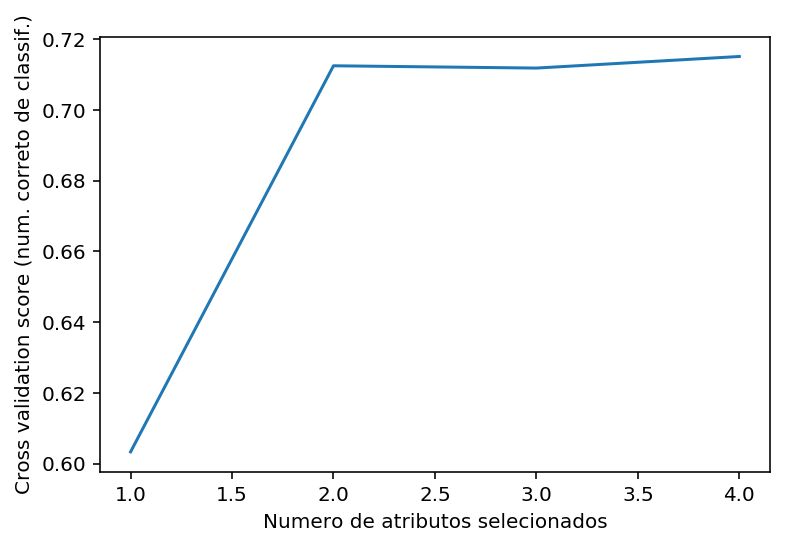

0 area 0.6
1 box 0.71
2 condominium 0.71
3 rooms 0.72


In [392]:
# Identificar a quantidade ótima de atributos
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold


#from sklearn.model_selection import StratifiedKFold
clf = RandomForestRegressor(n_estimators=50, random_state=42)
#rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(2)) #,
#              scoring='accuracy')
rfecv = RFECV(estimator=clf, step=1)
rfecv.fit(X, y)
X_new = rfecv.transform(X)
print("\nNúmero ótimo de atributos : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Numero de atributos selecionados")
plt.ylabel("Cross validation score (num. correto de classif.)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show();


features_list_kb = []
for i in rfecv.get_support(indices=True):
    print (i, features_list[i], round(rfecv.grid_scores_[i],2))
    features_list_kb.append([features_list[i], round(rfecv.grid_scores_[i],2)])

In [393]:
features_list

['area', 'box', 'condominium', 'rooms']

In [394]:
X_new.shape[1]

4

In [395]:
from sklearn.feature_selection import SelectKBest
from operator import itemgetter
selector = SelectKBest(k="all") # posso inserir o valor que desejar
selector.fit(X, y)
X_new = selector.transform(X)
print ("\nComposição dos atributos após KBest:", X_new.shape)
features_list_kb = []
for i in selector.get_support(indices=True):
    print (features_list[i], round(selector.scores_[i],2))
    features_list_kb.append([features_list[i], round(selector.scores_[i],2)])

#print selector.get_support(indices=True)
print ("\nAtributos em ordem de importância:")
features_list_kb = sorted(features_list_kb, key=itemgetter(1), reverse=True) 
for sublst in features_list_kb:
    for item in sublst:
        print (item)


Composição dos atributos após KBest: (101, 4)
area 4.45
box 2.39
condominium 3.44
rooms 1.67

Atributos em ordem de importância:
area
4.45
condominium
3.44
box
2.39
rooms
1.67


In [396]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.33, random_state=42)


In [397]:
X_new.shape

(101, 4)

In [398]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures


parameters = {'n_estimators':[10, 50, 100], 
              'criterion':['mse', 'mae'],
              'max_features':["auto", "sqrt", "log2"],
             'random_state':[42]}

rfr = RandomForestRegressor()

grid = GridSearchCV(rfr, parameters, cv=5)
grid.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Train set score: {:.2f}".format(grid.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))
#print("Best estimator:\n{}".format(grid.best_estimator_))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, grid.predict(X_test))
print("MSE: %.4f" % mse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, grid.predict(X_test))
print("MAE: %.4f" % mae)
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, grid.predict(X_test))
print("EVS: %.4f" % evs)

Best cross-validation accuracy: 0.65
Train set score: 0.95
Test set score: 0.73
Best parameters: {'criterion': 'mse', 'max_features': 'sqrt', 'n_estimators': 50, 'random_state': 42}
MSE: 41296718151.3976
MAE: 163210.2941
EVS: 0.7454


In [399]:
# sequência de input para previsão de preço de um imóvel
print (features_list_kb)
print (X_new.shape[1])
print (features_list)


[['area', 4.45], ['condominium', 3.44], ['box', 2.39], ['rooms', 1.67]]
4
['area', 'box', 'condominium', 'rooms']


In [400]:
# prevendo o preço de um imóvel
imovel = [[119, 2, 750, 3]]
prev = int(grid.predict(imovel))
var = 795000 - prev
print (prev)
print (var)
if var < 0:
    print ("Oportunidade com desconto de: {:.2f}%". format(var*100/prev))

#5685, 48361, 14155    

834740
-39740
Oportunidade com desconto de: -4.76%


In [401]:
# Este processo se mostrou melhor para escolher os Xs

# Get numerical feature importances
importances = list(grid.best_estimator_.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: area                 Importance: 0.46
Variable: condominium          Importance: 0.43
Variable: rooms                Importance: 0.1
Variable: box                  Importance: 0.01


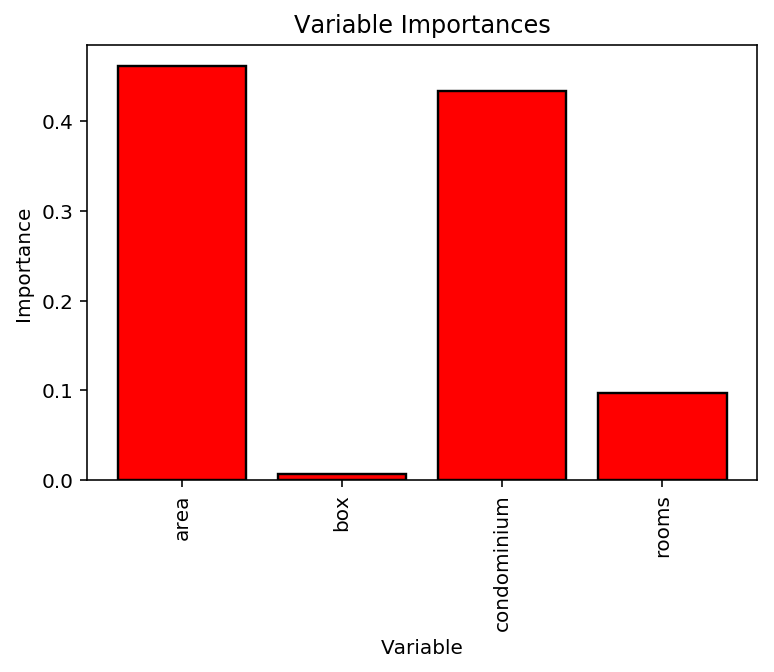

In [402]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, features_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

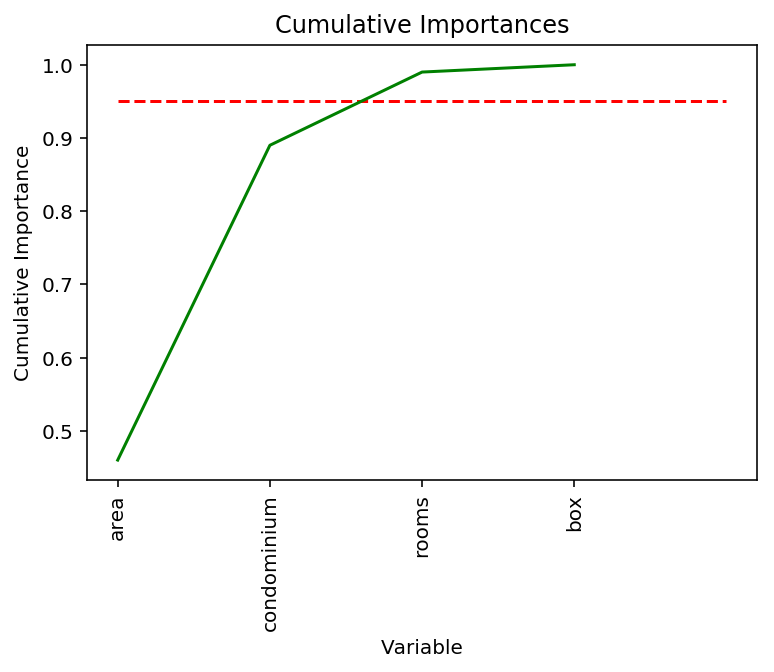

In [403]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [404]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 3


In [405]:
'''
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:5]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]
# Create training and testing sets with only the important features
important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]
# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)
'''

"\n# Extract the names of the most important features\nimportant_feature_names = [feature[0] for feature in feature_importances[0:5]]\n# Find the columns of the most important features\nimportant_indices = [feature_list.index(feature) for feature in important_feature_names]\n# Create training and testing sets with only the important features\nimportant_train_features = train_features[:, important_indices]\nimportant_test_features = test_features[:, important_indices]\n# Sanity check on operations\nprint('Important train features shape:', important_train_features.shape)\nprint('Important test features shape:', important_test_features.shape)\n"

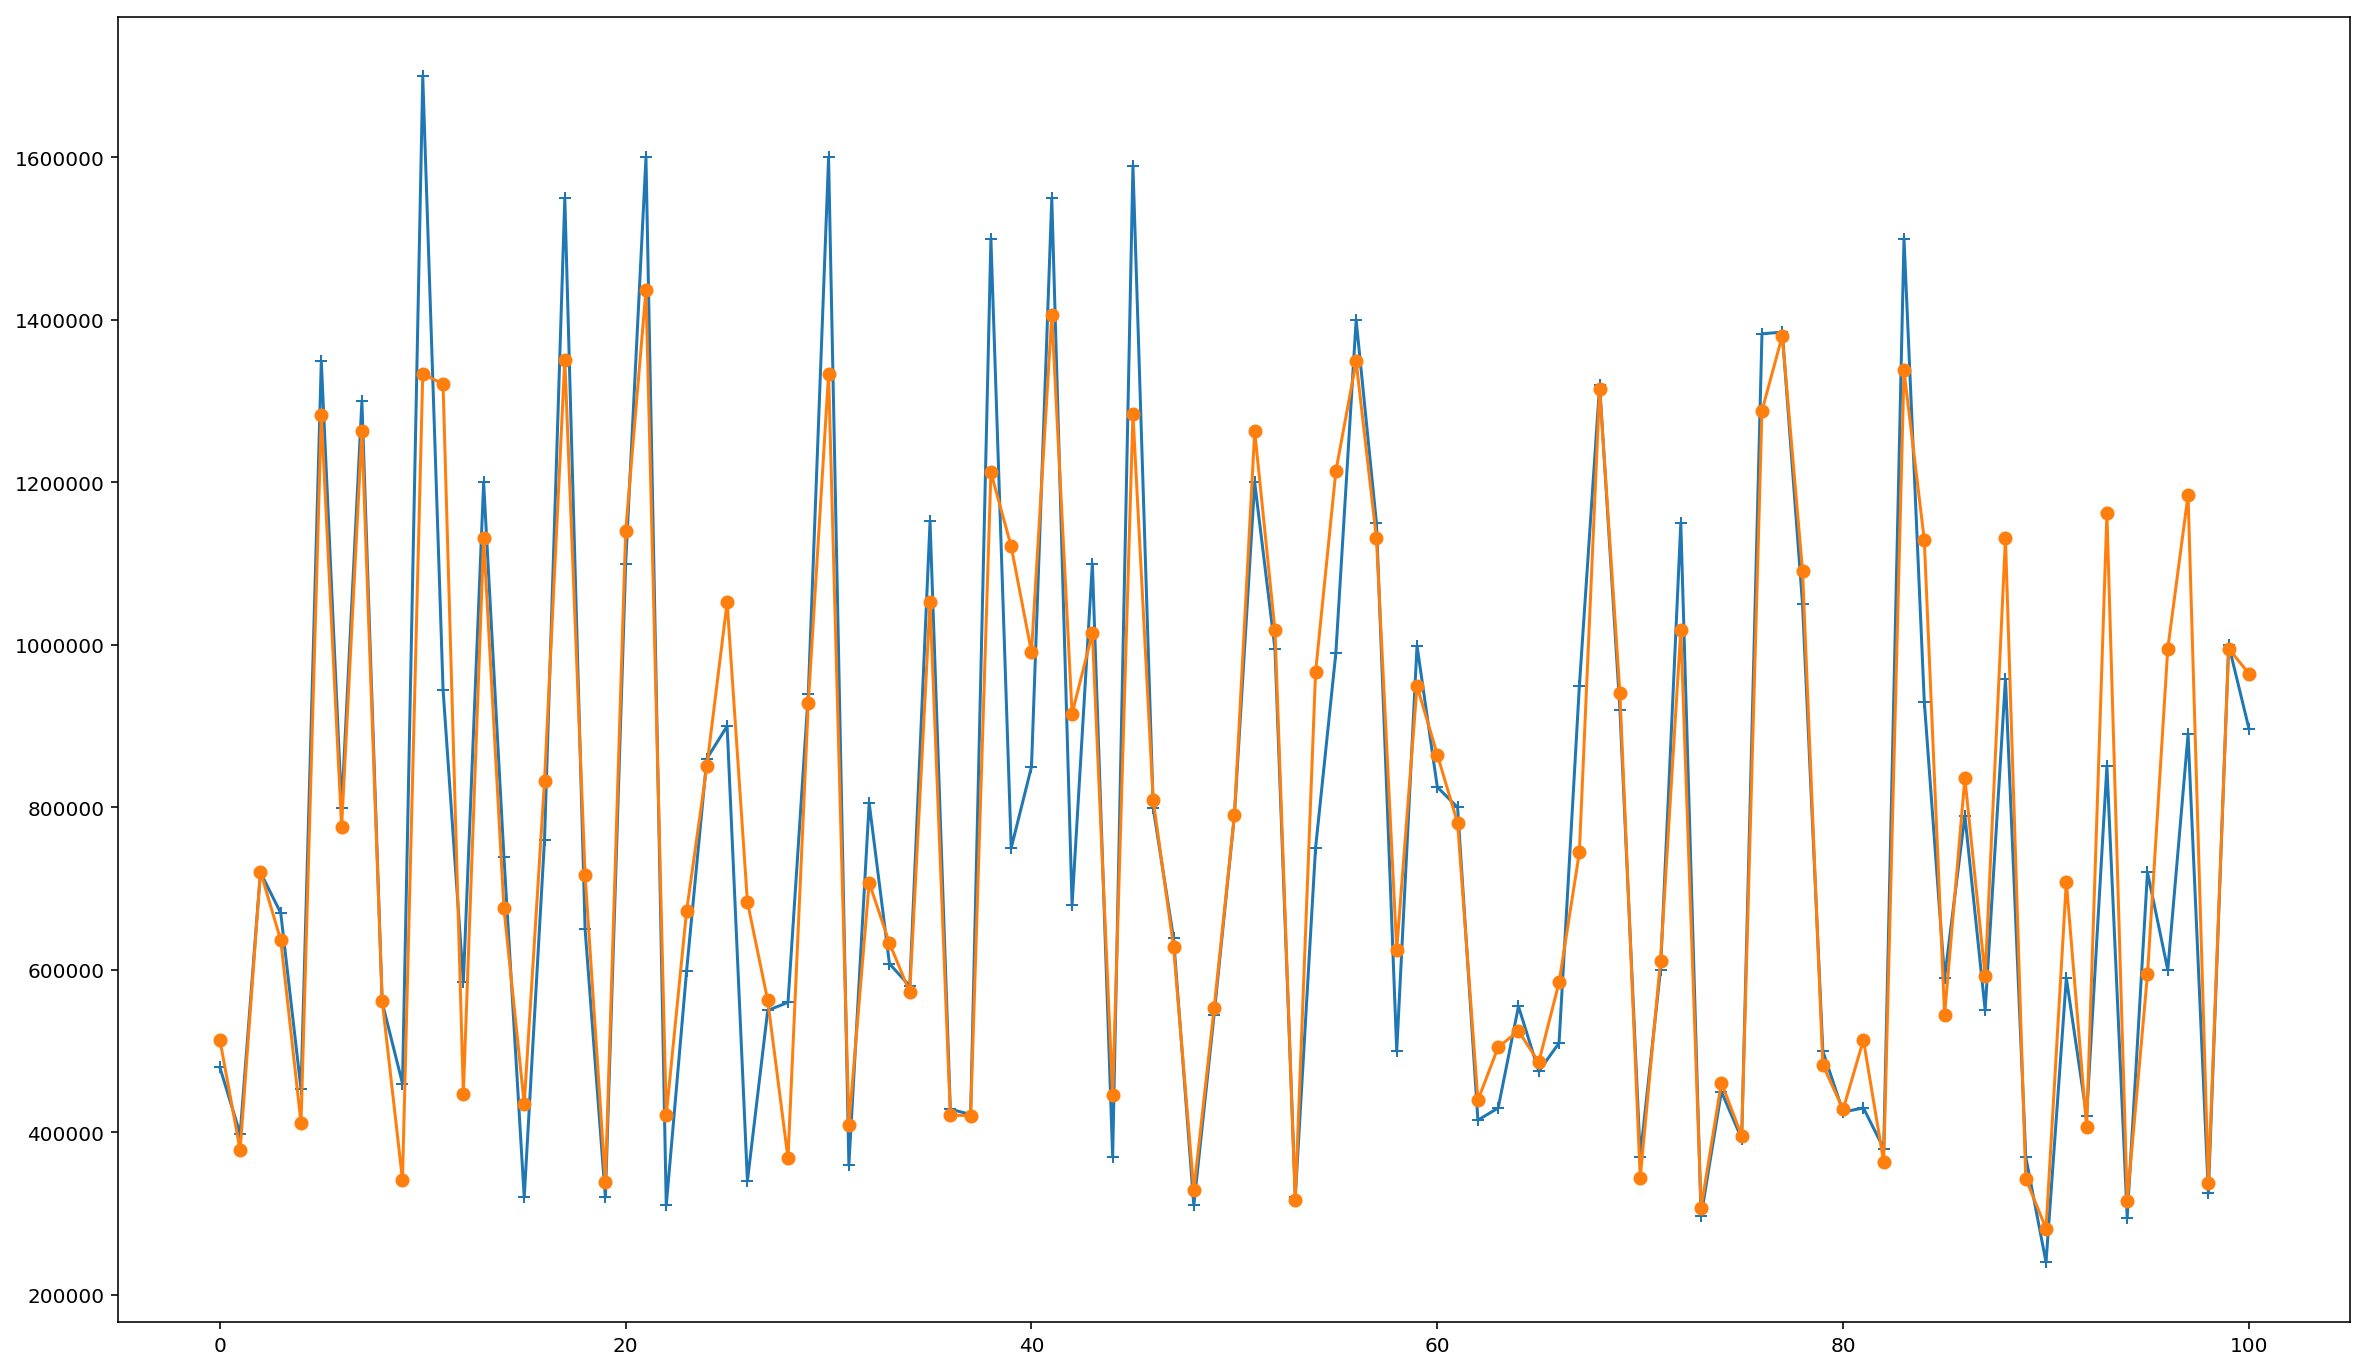

In [406]:
# identificar oportunidades
# gráfico preço ofertado x preço previsto
plt.figure(figsize=(20,12))
prev = (grid.predict(X_new))
plt.plot(range(0, y.shape[0]), y, marker='+')
plt.plot(range(0, prev.shape[0]), prev, marker='o')

## Para prever o preço de um determinado imóvel

In [407]:
# calcular valores: oportunidades ou super avaliados
df['pred'] = grid.predict(df[['area', 'condominium']]) # salvar valores preditivos
df['var'] = df['price'] - df['pred'] # salvar diferença preço e preditivo
df['var_p'] = df['var'] * 100 / df['pred'] # salvar a variação percentual

ValueError: Number of features of the model must match the input. Model n_features is 4 and input n_features is 2 

In [ ]:
# identificar concorrentes

final_select = df.query("(var < 0 & box == 2. & area > 100. & price < 800000)").sort_values(by='var_p')
final_select


In [ ]:
#salvando csv
final_select.to_csv(('MontSerrat.csv'), sep='\t')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

pipe = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(),
    RandomForestRegressor())


param_grid = {
     'randomforestregressor__n_estimators': [50, 100],
     'randomforestregressor__max_features': [1],
     'polynomialfeatures__degree': [1, 2, 3]
    }

    


grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
#print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))
#print("Best estimator:\n{}".format(grid.best_estimator_))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, grid.predict(X_test))
print("MSE: %.4f" % mse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, grid.predict(X_test))
print("MAE: %.4f" % mae)
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, grid.predict(X_test))
print("EVS: %.4f" % evs)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(),
    GradientBoostingRegressor())


param_grid = {
    'gradientboostingregressor__loss': ['ls', 'lad', 'huber', 'quantile'],
    'gradientboostingregressor__n_estimators': [50, 100],
    'gradientboostingregressor__max_features': [rfecv.n_features_],
    'gradientboostingregressor__max_depth': [1, 2, 3],
    'polynomialfeatures__degree': [1, 2, 3]
    }

    


grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
#print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))
#print("Best estimator:\n{}".format(grid.best_estimator_))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, grid.predict(X_test))
print("MSE: %.4f" % mse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, grid.predict(X_test))
print("MAE: %.4f" % mae)
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, grid.predict(X_test))
print("EVS: %.4f" % evs)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(),
    AdaBoostRegressor())


param_grid = {
    'adaboostregressor__loss': ['linear', 'square', 'exponential'],
    'adaboostregressor__n_estimators': [50, 100],
    'polynomialfeatures__degree': [1, 2, 3]
    }

    


grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
#print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))
#print("Best estimator:\n{}".format(grid.best_estimator_))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, grid.predict(X_test))
print("MSE: %.4f" % mse)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, grid.predict(X_test))
print("MAE: %.4f" % mae)
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, grid.predict(X_test))
print("EVS: %.4f" % evs)

In [ ]:
# prevendo o preço de um imóvel
imovel = [[119, 750, 3]]
prev = int(grid.predict(imovel))
var = 795000 - prev
print (prev)
print (var)
if var < 0:
    print ("Oportunidade com desconto de: {:.2f}%". format(var*100/prev))


